### A prediction model for predicting Toyota Corolla Price 

#### Importing the Libearies 

In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

#### Importing the dataset 

In [2]:
data = pd.read_csv('F://Data_Set/ToyotaCorolla.csv',
        usecols=['Price','Age_08_04','KM','HP','Gears','cc','Doors','Quarterly_Tax','Weight'])  

In [3]:
data.head() 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Dataset Information 

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


Check any Null Value Present in the Dataset or Not 

In [5]:
data.isnull().sum() 

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

#### Correlation 

In [6]:
data.corr() 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


#### Scatter Plot Between Variables along with Histogram 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

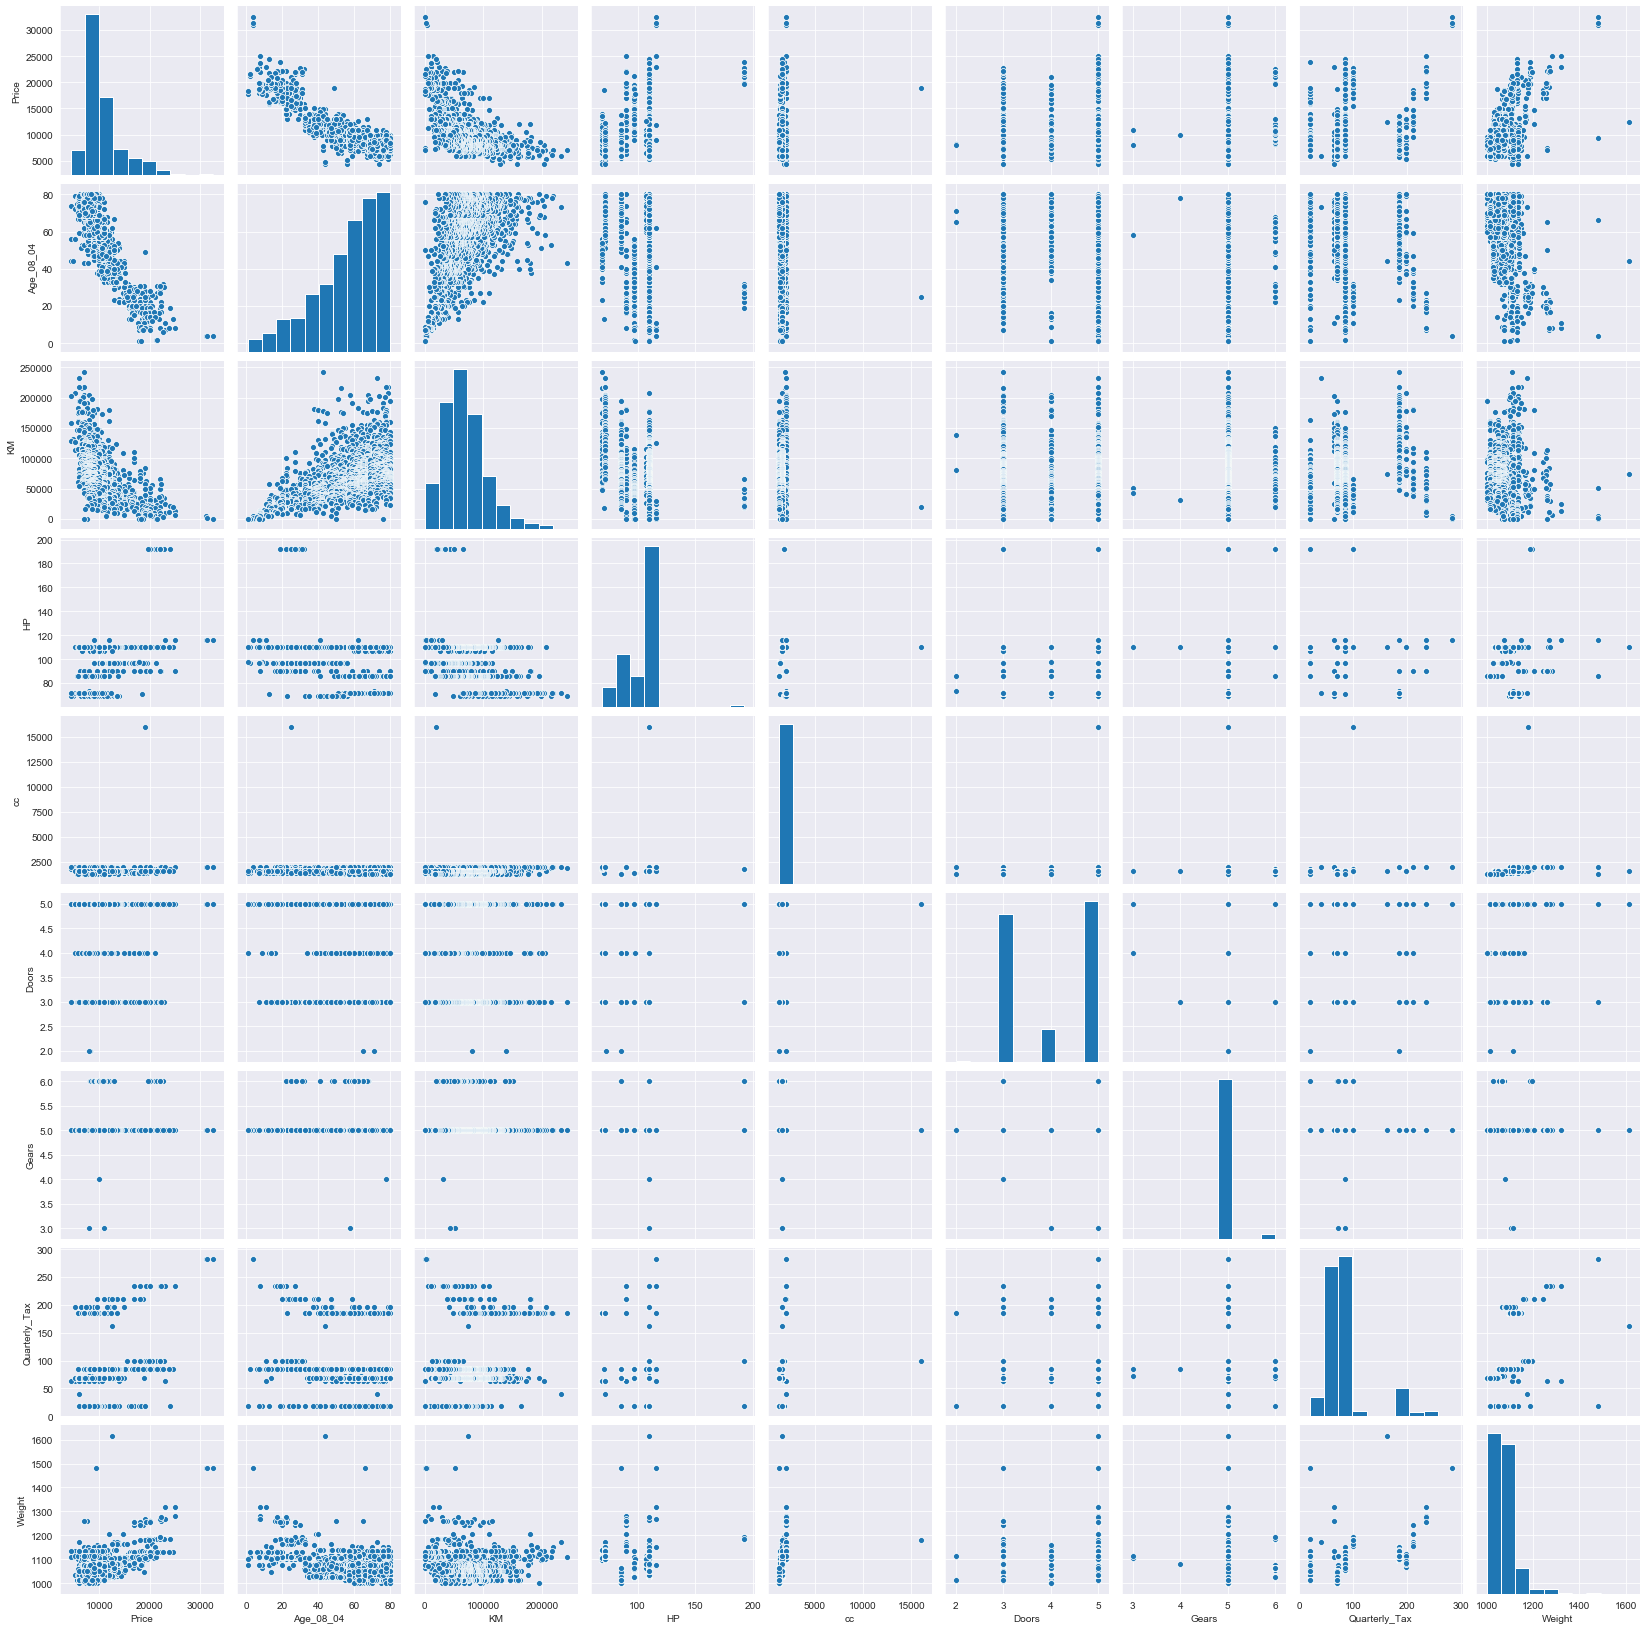

In [7]:
sns.set_style(style='darkgrid')

sns.pairplot(data) 

#### 1st Model Genration

In [8]:
dataset_1 = data 

In [9]:
model_1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=dataset_1).fit()

Coefficent of Model 

In [10]:
model_1.params 

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

#### Residual Analysis 

Test for Normality of Residuals (Q-Q Plot) of 1st Model

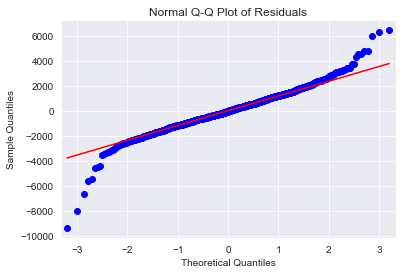

In [11]:
qqplot = sm.qqplot(model_1.resid,line='q') 
plt.title('Normal Q-Q Plot of Residuals')
plt.show() 

#### Predict from 1st Model 

In [12]:
New_Data = pd.DataFrame({'Age_08_04':25,'KM':46000,'HP':95,'cc':1800,'Doors':3,
                         'Gears':5,'Quarterly_Tax':180,'Weight':1190},index=[1])  

In [13]:
New_Data 

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,25,46000,95,1800,3,5,180,1190


In [14]:
y1_pred = model_1.predict(New_Data)  

In [15]:
y1_pred 

1    17077.907353
dtype: float64

Sumary of 1st Model 

In [16]:
model_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:55:22   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2nd Model Genration by Using log Transformation on the dataset 

In [17]:
dataset_2 = data 

In [19]:
dataset_2['Price'] = np.log(dataset_2['Price']+1)
dataset_2['Age_08_04'] = np.log(dataset_2['Age_08_04']+1)
dataset_2['KM'] = np.log(dataset_2['KM']+1) 
dataset_2['HP'] = np.log(dataset_2['HP']+1) 
dataset_2['cc'] = np.log(dataset_2['Doors']+1)
dataset_2['Gears'] = np.log(dataset_2['Gears']+1) 
dataset_2['Quarterly_Tax'] = np.log(dataset_2['Quarterly_Tax']+1) 
dataset_2['Weightg'] = np.log(dataset_2['Weight']+1) 

#### Fitting 2nd Multiple Linear Regression Model on Log Transformed Dataset 

In [20]:
 model_2=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weightg',data=dataset_2).fit()

Test for Normality of Residuals (Q-Q Plot) of 2nd Model 

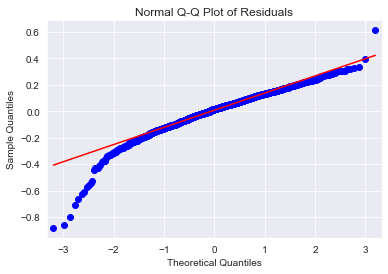

In [21]:
qqplot = sm.qqplot(model_2.resid,line='q') 
plt.title('Normal Q-Q Plot of Residuals')
plt.show() 

Summary of 2nd Model 

In [22]:
model_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     666.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:58:01   Log-Likelihood:                 751.52
No. Observations:                1436   AIC:                            -1487.
Df Residuals:                    1428   BIC:                            -1445.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.2129      0.803      6.491      0.000       3.637       6.788
Age_08_04        -0.4834      0.012    -41.050      0.000      -0.506      -0.460
KM                0.0100      0.005      1.991      0.047       0.000       0.020
HP                0.4071      0.028     14.516      0.000       0.352       0.462
cc                0.0371      0.021      1.755      0.080      -0.004       0.079
Gears             0.3731      0.127      2.928      0.003       0.123       0.623
Quarterly_Tax     0.0421      0.011      3.967      0.000       0.021       0.063
Weightg           0.4343      0.114      3.809      0.000       0.211       0.658
==============================================================================
Omnibus:                      303.912   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1087.583
Skew:                          -1.004   Prob(JB):                    6.83e-237
Kurtosis:                       6.761   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3rd Model Genration by Using Reciprocal Transformation on the dataset 

In [23]:
dataset_3 = data 

#### Reciprocal Transformation on the Dataset 

In [24]:
dataset_3['Price'] = 1/(dataset_3['Price']+1)
dataset_3['Age_08_04'] = 1/(dataset_3['Age_08_04']+1)
dataset_3['KM'] = 1/(dataset_3['KM']+1) 
dataset_3['HP'] = 1/(dataset_3['HP']+1) 
dataset_3['cc'] = 1/(dataset_3['Doors']+1)
dataset_3['Gears'] = 1/(dataset_3['Gears']+1) 
dataset_3['Quarterly_Tax'] = 1/(dataset_3['Quarterly_Tax']+1) 
dataset_3['Weightg'] = 1/(dataset_3['Weight']+1) 

#### Fitting 3rd Multiple linear Regression Model on Reciprocal Transformed Data

In [25]:
model_3=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weightg',data=dataset_3).fit()

Test for Normality of Residuals (Q-Q Plot) of 3rd Model 

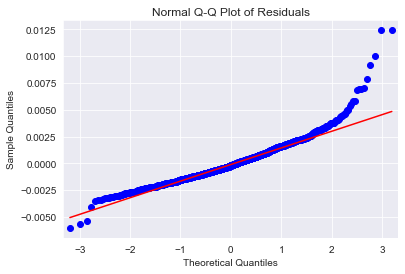

In [26]:
qqplot = sm.qqplot(model_3.resid,line='q') 
plt.title('Normal Q-Q Plot of Residuals')
plt.show() 

Summary of 3rd Model 

In [27]:
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     330.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.19e-293
Time:                        14:06:14   Log-Likelihood:                 7106.6
No. Observations:                1436   AIC:                        -1.420e+04
Df Residuals:                    1428   BIC:                        -1.416e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0633      0.004     14.138      0.000       0.055       0.072
Age_08_04        -0.0627      0.002    -31.831      0.000      -0.067      -0.059
KM                0.0128      0.001      9.202      0.000       0.010       0.016
HP                0.1354      0.010     13.344      0.000       0.115       0.155
cc                0.0006      0.001      0.483      0.629      -0.002       0.003
Gears             0.0235      0.012      2.010      0.045       0.001       0.046
Quarterly_Tax     0.0078      0.003      2.591      0.010       0.002       0.014
Weightg          12.9845      1.421      9.138      0.000      10.197      15.772
==============================================================================
Omnibus:                      420.246   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2219.876
Skew:                           1.265   Prob(JB):                         0.00
Kurtosis:                       8.541   Cond. No.                     3.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""